In [1]:
import urllib.request
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [45]:
# roundabout data has been extracted from openstreetmap with overpass API: https://overpass-turbo.eu/s/1nh3
gdf_swimmingpools = gpd.read_file('data/openstreetmap-martinique-swimming-pools.geojson')
gdf_swimmingpools['geometry'] = gdf_swimmingpools['geometry'].apply(lambda x: x.centroid)

In [46]:
COMMUNES_FILE = 'data/communes-martinique.geojson'

gdf_mq = gpd.read_file(COMMUNES_FILE)

In [47]:
# join -> swimming pool inside a city polygon
# left join is selected as I dont know how to deal with swimming pool that were not found inside any city 
# 8 such cases were founds, at least some seem legits => city shapes not very precise ...
gpd_joined = gpd.sjoin(gdf_mq, gdf_swimmingpools[['id', 'geometry']], how="inner", predicate='intersects').sort_values('code')

# count nb swimming pool per city
gdf_mq = gdf_mq.merge(gpd_joined[['code', 'id']].groupby(by=['code']).agg(nb_swimming_pools=('id', 'size')).reset_index(), on="code", how="left").fillna(0)

In [48]:
# insee data : https://www.insee.fr/fr/statistiques/6011060?sommaire=6011075
INSEE_URL_POP_LEGALE_MQ_2019 = 'https://www.insee.fr/fr/statistiques/fichier/6011060/dep972.xlsx'
INSEE_LOCAL_FILE_POP_LEGALE_MQ_2019 = 'output-tmp/insee-mq-pop-legale-2019.xlsx'

urllib.request.urlretrieve(INSEE_URL_POP_LEGALE_MQ_2019, INSEE_LOCAL_FILE_POP_LEGALE_MQ_2019)
df = pd.read_excel(INSEE_LOCAL_FILE_POP_LEGALE_MQ_2019, skiprows=7, sheet_name="Communes", engine="openpyxl")
df['code'] = df['Code département'].astype(str).str[:2] + df['Code commune'].astype('str')

gdf_mq = gdf_mq.merge(df[['code', 'Population municipale', 'Population comptée à part', 'Population totale']], on="code")
gdf_mq['swimming_pool_per_1000h'] = 1000 * gdf_mq['nb_swimming_pools'] / gdf_mq['Population municipale']

/home/glefait/.virtualenvs/notebooks/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


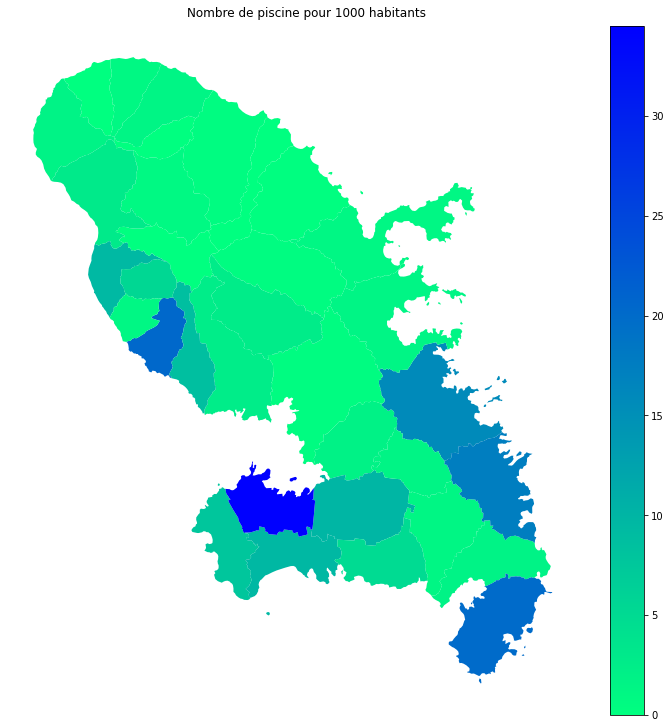

In [70]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(10, 10))
fig.suptitle("Nombre de piscine pour 1000 habitants")
gdf_mq.plot(ax=ax, column='swimming_pool_per_1000h', legend=True, cmap='winter_r')
_ = ax.axis('off')

fig.savefig('output/2022-11-08.png', facecolor='white')

In [56]:
gdf_mq

,code,nom,geometry,nb_swimming_pools,Population municipale,Population comptée à part,Population totale,swimming_pool_per_1000h
0,97201,Ajoupa-Bouillon,"POLYGON ((-61.14848 14.80590, -61.15340 14.805...",0.0,1756.0,31.0,1787.0,0.000000
1,97202,Anses-d'Arlet,"MULTIPOLYGON (((-61.05330 14.45579, -61.05472 ...",27.0,3494.0,53.0,3547.0,7.727533
2,97203,Basse-Pointe,"POLYGON ((-61.16381 14.81601, -61.16249 14.818...",4.0,2823.0,42.0,2865.0,1.416932
3,97204,Carbet,"POLYGON ((-61.16765 14.67530, -61.16847 14.676...",33.0,3461.0,47.0,3508.0,9.534817
4,97205,Case-Pilote,"POLYGON ((-61.11754 14.62759, -61.11877 14.628...",91.0,4455.0,68.0,4523.0,20.426487
5,97206,Diamant,"MULTIPOLYGON (((-61.05793 14.50678, -61.05356 ...",53.0,5511.0,74.0,5585.0,9.617129
6,97207,Ducos,"POLYGON ((-61.00063 14.55991, -61.00108 14.560...",33.0,17655.0,287.0,17942.0,1.869159
7,97208,Fonds-Saint-Denis,"POLYGON ((-61.12165 14.71927, -61.12344 14.719...",0.0,680.0,12.0,692.0,0.000000
8,97209,Fort-de-France,"POLYGON ((-61.10080 14.69536, -61.09925 14.697...",191.0,76512.0,898.0,77410.0,2.496340
9,97210,François,"MULTIPOLYGON (((-60.93572 14.58822, -60.93520 ...",254.0,15980.0,210.0,16190.0,15.894869


In [16]:
gdf_mq.columns

Index(['code', 'nom', 'geometry', 'Code région', 'Nom de la région',
       'Code département', 'Code arrondissement', 'Code canton',
       'Code commune', 'Nom de la commune', 'Population municipale',
       'Population comptée à part', 'Population totale', 'index_right', 'id',
       '@id', 'leisure', 'source', 'sport', 'access', 'addr:housenumber',
       'addr:postcode', 'addr:street', 'name', 'note:import-bati', 'name:en',
       'wall', 'covered', 'surface', 'building', 'swimming_pool'],
      dtype='object')

,code,nb_swimming_pools
0,97201,1
1,97202,27
2,97203,4
3,97204,33
4,97205,91
5,97206,53
6,97207,33
7,97208,1
8,97209,191
9,97210,254
